In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d
import matplotlib
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'font.size': 16})

In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))

train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-1]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-1]), df_pions[-1000:,-1]



In [3]:
#opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.7, beta_2= 0.99)
#inital_test = cf.trained_network(train_x[:100],train_y[:100],val_x,val_y,[512,512], optimizer= opt, verbose= 0).history


I think I want a b1,b2 array at which I evaluate the minimum point for all of these I think again this should be a mean from 10

In [43]:

def adam_tester(num_beta_1D,repeats,section = None):
    beta_range = np.linspace(0.9,1,num_beta_1D)
    mae_min = np.zeros((num_beta_1D,num_beta_1D,repeats))
    a = 0
    for i in range(num_beta_1D):
        for j in range(num_beta_1D):
            a += 1
            print('#',a)
            opt = keras.optimizers.Adam(learning_rate= 0.001, beta_1 = beta_range[i], beta_2= beta_range[j])
            for k in range(repeats):
                mae_min[i,j,k] = np.min(cf.trained_network(train_x[:section],train_y[:section],val_x,val_y,[512,512], optimizer= opt, verbose= 0,batch_size= 32).history['val_mean_absolute_percentage_error'])
    return mae_min, beta_range



In [44]:
mape_min_multiple, beta_range = adam_tester(10,5)

# 1
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9
# 10
# 11


KeyboardInterrupt: 

In [21]:

min_mae_2d = mape_min_multiple.reshape(mape_min_multiple.shape[0],-1)

In [22]:
np.savetxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Testing_Data/adam/adam_beta_test.csv',min_mae_2d,delimiter=',')

In [23]:
loaded_reshape = np.loadtxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Testing_Data/adam/adam_beta_test.csv',delimiter= ',')
loaded_mae_min = loaded_reshape.reshape(10,100//10,5)

In [24]:
print(loaded_mae_min.shape)
if np.isclose(mape_min_multiple,loaded_mae_min).all:
    print('fuck yes')
else: 
    print('dum cunt ')


(10, 10, 5)
fuck yes


In [25]:
print(loaded_mae_min)

[[[   4.43133688    4.34911919    4.49157429    4.49652719    4.52003384]
  [   4.58702803    4.37165403    4.34907579    4.87552691    4.43416309]
  [   4.65664816    4.42723227    4.13669157    4.0160532     4.68072367]
  [   4.21529722    4.31885433    4.40844631    4.80996847    4.27239704]
  [   4.15451574    4.07525921    4.27928972    4.48786688    4.37512016]
  [   4.3170166     4.10488129    4.14168453    4.04691219    4.19561577]
  [   4.44052982    4.7595458     4.35779619    4.25085497    4.3168745 ]
  [   4.52318907    4.52789879    4.57327652    4.4151206     4.69468307]
  [   4.51975441    4.61253691    4.6358428     4.84077168    4.22948408]
  [1297.34570312 1198.37353516 1095.4642334  1075.09204102 1368.94030762]]

 [[   4.21389008    4.38724375    4.44823694    4.3908968     4.35222483]
  [   4.71527338    4.69673443    4.46457243    4.37029886    4.34160233]
  [   4.54640245    4.46751022    4.13242674    4.25142527    4.36621666]
  [   4.14491177    4.52775383    4.

In [65]:
mean_mae_min = np.nan_to_num(np.mean(loaded_mae_min,axis = 2),nan = 5)
beta_range = np.linspace(0.9,1,10)
#ste = np.nan_to_num(np.std(loaded_mae_min,axis = 2), nan = 5)
#ste = ste*5**-0.5
#np.mean(ste[np.where(ste<1)])


In [66]:
mean_mae_min[np.where(mean_mae_min>5)] = 5
beta_range_array = np.ones_like(mean_mae_min)*beta_range
beta_range_array_2 = beta_range_array.transpose()

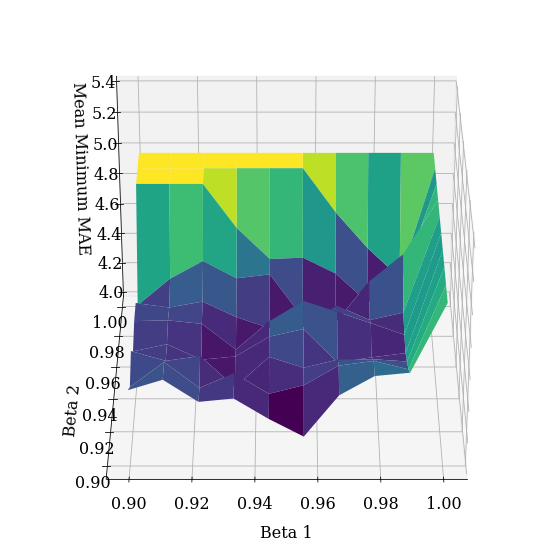

In [71]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(beta_range_array, beta_range_array_2, mean_mae_min , cmap = 'viridis')
ax.view_init(30,270)
ax.set_xlabel('Beta 1')
ax.set_ylabel('Beta 2')
ax.set_zlabel('Mean Minimum MAE')
ax.set_zlim(4,5.4)
ax.yaxis.labelpad =15
ax.xaxis.labelpad =15
ax.zaxis.labelpad =15

In [53]:
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/Adam_Beta_parameters_contour_plot_djuna_test.png',dpi = 300)

In [35]:
print(np.where(np.min(mean_mae_min) ==mean_mae_min))
print('Optimised beta 1 =', beta_range_array[7,9],'Optimised Beta 2 =', round(beta_range_array_2[7,9],3))

(array([0]), array([5]))
Optimised beta 1 = 1.0 Optimised Beta 2 = 0.978


In [42]:
print(beta_range[7],beta_range[9])
print(np.min(mean_mae_min))

0.9777777777777777 1.0
4.161222076416015


Best Beta value 
B1 = 0.881
B2 = 0.99

In [73]:
print(beta_range[-3])

0.9777777777777777
